## Author: Devendra Nagpure
## Roll Number: ME22D034

![qu2](Screenshot%202025-03-08%20201332.png)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Given parameters
E = 200000  # Young's modulus (MPa)
a = 10 # 10 mm in meters
h = 2 * a  # Beam height
I = (1/12) * (a) * (h**3)  # Moment of inertia for rectangular cross-section
c = h / 2  # Distance to outer fiber

# Voce Hardening Parameters
sigma_0 = E / 500  # Initial yield stress
sigma_u = 1.5 * sigma_0  # Ultimate stress
s0 = 0.1  # Voce hardening parameter

# Compute Yield Moment My
My = sigma_0 * I / c

# Compute amplitude of curvature
rho_0 = (3 * My) / (2 * E * I)

# Time values for one full cycle (0 to 1 second)
t = np.linspace(0, 1, 1000)  # time steps
rho = rho_0 * np.sin(2 * np.pi * t)  # Cyclic curvature


# Normalized curvature
alpha_rho = rho * a

# y position 
y_position= np.linspace(-c,c,1000)

# Initialize moment storage
M = np.zeros_like(t)  # Bending moment
plastic_strain = np.zeros(len(y_position))  # Plastic strain evolution
stress = np.zeros(len(y_position))  # Stress distribution

s= np.zeros(len(y_position)) # plastic arc length


yield_strength = sigma_0 + (sigma_u-sigma_0)*(1-np.exp(-s/s0))
H= (sigma_u-sigma_0)*np.exp(-s/s0)





In [29]:
for i in range(1,len(rho)):
    del_rho= rho[i]-rho[i-1]
    # Initializing change in strain and elastic stress (trail stress)
    del_eps= -y_position*del_rho
    stress= stress+ E*del_eps

    del_eps_p= np.zeros(len(y_position))
    

    for j in range(len(y_position)):
        
        stress_trail= stress[j]

        yield_fun= abs(stress_trail) - yield_strength[j]
        
        if yield_fun>0:
            
            d_lambda_0=  0 # yield_fun/(E+H[j])

            # Define the function
            def equation(d_lambda):
                eq= yield_fun - E*d_lambda- (
                    sigma_0 + (sigma_u-sigma_0)*(1-np.exp(-(s[j]+d_lambda)/s0))- yield_strength[j])
                return eq
            # Solve using Newton-Raphson method
            soln = newton(equation, d_lambda_0)
            d_lambda= soln
            
        else:
            d_lambda= 0

                
        del_eps_p[j]= d_lambda*np.sign(stress_trail)
        d_s= d_lambda
        
        s[j]= s[j]+ d_s # update plastic arc length
        yield_strength[j]= sigma_0 + (sigma_u-sigma_0)*(1-np.exp(-s[j]/s0))
        H[j]= (sigma_u-sigma_0)*np.exp(-s[j]/s0)
        
        # Update state variable
        stress[j] = stress[j]- E* del_eps_p[j]
        plastic_strain[j] = plastic_strain[j]+del_eps_p[j]

    #calculaing change im moment    
    del_M = E*I*del_rho+ E*a*np.trapz(y_position*del_eps_p,y_position) #calculaing change im moment
    
    M[i]= M[i-1] + del_M
    
    



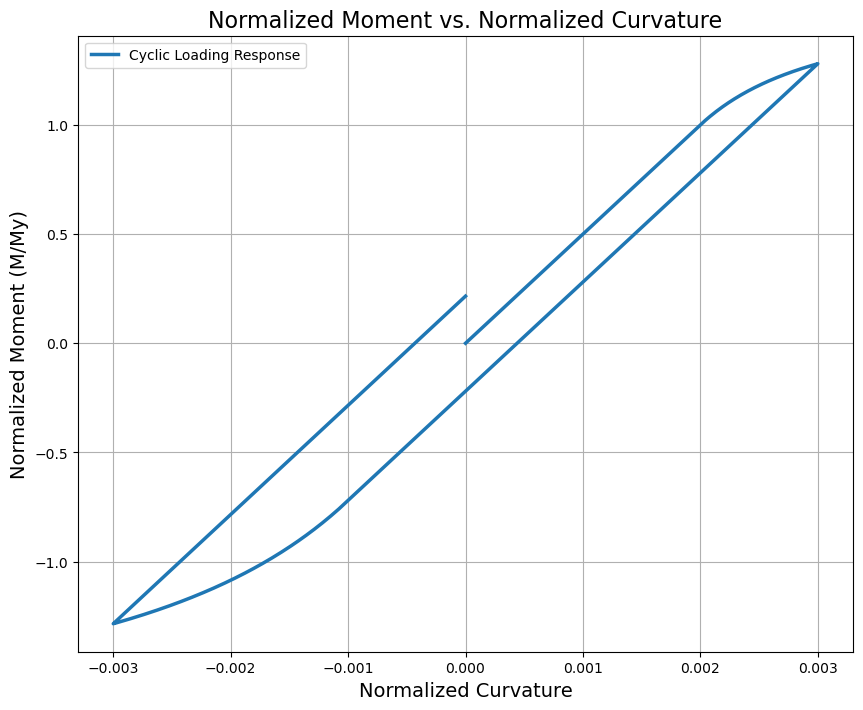

In [30]:
# Plot
plt.figure(figsize=(10,8))
plt.plot(alpha_rho, (M/My), linestyle='-', linewidth=2.5, label="Cyclic Loading Response")
plt.xlabel("Normalized Curvature", fontsize=14)
plt.ylabel("Normalized Moment (M/My)", fontsize=14)
plt.title("Normalized Moment vs. Normalized Curvature", fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

